In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from sklearn import linear_model
import seaborn as sns
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', None)

In [2]:
# #Grabbing the database file and connecting
sqlite_file = 'lahmansbaseballdb.sqlite'
conn = sqlite3.connect(sqlite_file)

HOF_query = 'SELECT playerID,ballots,votes from HallOfFame WHERE votedBy="BBWAA" AND inducted="Y"'
# # Grabbing the yearID, teamID, and the total payroll (by grouping) 
# # from the Salary Table. We group by yearID and teamID to get one 
# # Salary entry per year per team.

batting_reg_query = "SELECT playerID,SUM(H) as total_hits, SUM(AB), SUM(HR),SUM([2B]), SUM([3B]),SUM(BB),SUM(HBP), SUM(SB) from Batting GROUP BY playerID"

fielding_reg_query = 'SELECT playerID, Pos, SUM(G), SUM(PO), SUM(A), SUM(E) from Fielding GROUP BY playerID'

# # Reading the SQL to create the 2 dataframes
reg_batting = pd.read_sql(batting_reg_query, conn)
reg_fielding = pd.read_sql(fielding_reg_query, conn)
hallOfFame = pd.read_sql(HOF_query,conn)

# Meaning of Batting Terms:


At Bat (AB): When a batter reaches base via a fielder's choice, hit or an error (not including catcher's interference) or when a batter is put out on a non-sacrifice. 

Homerun (HR): When a batter hits a fair ball and scores on the play without being put out or without the benefit of an error.

Hit (H): When a batter strikes the baseball into fair territory and reaches base without doing so via an error or a fielder's choice.

Double (2B): When a batter hits the ball into play and reaches second base without the help of an intervening error or attempt to put out another baserunner.

Triple (3B): When a batter hits the ball into play and reaches third base without the help of an intervening error or attempt to put out another baserunner.

Total Base (TB): The number of bases gained by a batter through his hits. A batter records one total base for a single, two total bases for a double, three total bases for a triple and four total bases for a home run.

Intentional Walk (BB): When the defending team elects to walk a batter on purpose, putting him on first base instead of letting him try to hit.

Hit-By-Pitch (HBP): When a batter is struck by a pitched ball without swinging at it. He is awarded first base as a result. 

Stolen Base (SB): When a baserunner advances by taking a base to which he isn't entitled. 

# Meaning of Fielding Terms:

Position (POS): The position of a player on a team.

Games Played (G): A player is credited with having played a game if he appears in it at any point -- be it as a starter or a replacement. It's important to note that the player doesn't necessarily need an at-bat.

Putout (P): When the fielder physically records the act of completing an out -- whether it be by stepping on the base for a forceout, tagging a runner, catching a batted ball, or catching a third strike.

Assist (A): A fielder who touches the ball before a putout is recorded by another fielder.

Error (E): A fielder is given an error if, in the judgment of the official scorer, he fails to convert an out on a play that an average fielder should have made.

In [3]:
#reg_batting.join()

In [4]:
hallOfFame['Vote%'] = hallOfFame['votes']/hallOfFame['ballots'] * 100
# # Grab the voting percentage of each hall of famer by taking the number of votes,
# # Dividing it by number of ballets, and multiplying by 100.
hallOfFame.drop(['votes','ballots'],axis=1,inplace=True)
# # No longer need the votes or ballots columns, can drop those
hallOfFame

,playerID,Vote%
0,cobbty01,98.230088
1,ruthba01,95.132743
2,wagneho01,95.132743
3,mathech01,90.707965
4,johnswa01,83.628319
...,...,...
118,rodriiv01,76.018100
119,jonesch06,97.156398
120,guerrvl01,92.890995
121,thomeji01,89.810427


In [5]:
reg_stats = pd.merge(reg_fielding,reg_batting, on=['playerID'])
reg_stats.columns = ['playerID','POS','GP','PO','A','E','H','AB','HR','DBL','TPL','BB','HBP','SB']
reg_stats

# # Merge the fielding and batting statistics into one dataframe, grouped by player. 
# # Allows for comprehensive statistics on individual players

,playerID,POS,GP,PO,A,E,H,AB,HR,DBL,TPL,BB,HBP,SB
0,aardsda01,P,331,11,29,3.0,0,4,0,0,0,0,0.0,0.0
1,aaronha01,OF,3020,7436,429,144.0,3771,12364,755,624,98,1402,32.0,240.0
2,aaronto01,1B,387,1317,113,22.0,216,944,13,42,6,86,0.0,9.0
3,aasedo01,P,448,67,135,13.0,0,5,0,0,0,0,0.0,0.0
4,abadan01,1B,9,37,1,1.0,2,21,0,0,0,4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19486,zupofr01,C,13,31,1,2.0,3,18,0,1,0,2,0.0,0.0
19487,zuvelpa01,SS,201,267,415,23.0,109,491,2,17,2,34,2.0,2.0
19488,zuverge01,P,265,45,145,7.0,21,142,0,2,1,9,0.0,0.0
19489,zwilldu01,OF,342,755,37,25.0,364,1280,30,76,15,128,4.0,46.0


In [6]:
jeter = reg_stats.loc[reg_stats['playerID'] == 'jeterde01']
# # Takes only Derek Jeter's stats from the above dataframe.  

In [7]:
reg_HOF_stats = pd.merge(hallOfFame,reg_stats,on='playerID')
reg_HOF_stats

# # Takes the intersect of the players in the MLB HOF and their stats from the above dataframe.

,playerID,Vote%,POS,GP,PO,A,E,H,AB,HR,DBL,TPL,BB,HBP,SB
0,cobbty01,98.230088,OF,2954,6507,410,278.0,4189,11436,117,724,295,1249,94.0,896.0
1,ruthba01,95.132743,P,2436,4787,569,179.0,2873,8398,714,506,136,2062,43.0,123.0
2,wagneho01,95.132743,2B,2777,7940,6782,828.0,3420,10439,101,643,252,963,125.0,723.0
3,mathech01,90.707965,P,643,313,1506,57.0,362,1687,7,50,12,116,17.0,20.0
4,johnswa01,83.628319,P,815,292,1352,53.0,547,2324,24,94,41,110,13.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,rodriiv01,76.018100,C,2436,14922,1233,143.0,2844,9592,311,572,51,513,58.0,127.0
119,jonesch06,97.156398,SS,2405,1771,3581,243.0,2726,8984,468,549,38,1512,18.0,150.0
120,guerrvl01,92.890995,OF,1608,3169,126,125.0,2590,8155,449,477,46,737,103.0,181.0
121,thomeji01,89.810427,3B,1599,9450,1565,137.0,2328,8422,612,451,26,1747,69.0,19.0


In [8]:
reg_HOF_stats = reg_HOF_stats.append(jeter)
# Add Jeter to the HOF stats dataframe, since Jeter was not inducted into it until 2021.

In [9]:
pd.set_option('display.max_rows', 100)

In [10]:
reg_HOF_stats = reg_HOF_stats[(reg_HOF_stats.POS != 'P')]
reg_HOF_stats.head(10)

,playerID,Vote%,POS,GP,PO,A,E,H,AB,HR,DBL,TPL,BB,HBP,SB
0,cobbty01,98.230088,OF,2954,6507,410,278.0,4189,11436,117,724,295,1249,94.0,896.0
2,wagneho01,95.132743,2B,2777,7940,6782,828.0,3420,10439,101,643,252,963,125.0,723.0
5,lajoina01,83.582090,1B,2441,8520,6691,518.0,3243,9590,82,657,163,516,134.0,380.0
6,speaktr01,82.089552,OF,2717,6935,462,224.0,3514,10195,117,792,222,1381,103.0,432.0
9,sislege01,85.766423,1B,2036,18914,1573,274.0,2812,8267,102,425,164,472,48.0,375.0
10,collied01,77.737226,2B,2701,6621,7716,452.0,3315,9949,47,438,187,1499,77.0,741.0
11,keelewi01,75.547445,3B,2104,3170,363,167.0,2932,8591,33,241,145,524,129.0,495.0
12,hornsro01,78.111588,SS,2164,4495,6842,500.0,2930,8173,301,541,169,1038,48.0,135.0
14,friscfr01,84.472050,2B,2296,4918,7170,371.0,2880,9112,105,466,138,728,31.0,419.0
15,cochrmi01,79.503106,C,1452,6414,840,111.0,1652,5169,119,333,64,857,29.0,64.0


In [11]:
reg_HOF_stats['SGL'] = reg_HOF_stats['H'] - reg_HOF_stats['DBL'] - reg_HOF_stats['TPL'] - reg_HOF_stats['HR']
reg_HOF_stats['TB'] = reg_HOF_stats['SGL'] + (2*reg_HOF_stats['DBL']) + (3*reg_HOF_stats['TPL'])+(4*reg_HOF_stats['HR']) + reg_HOF_stats['BB'] + reg_HOF_stats['HBP']
reg_HOF_stats.drop(['SGL','DBL','TPL','BB','HBP'],axis=1,inplace=True)

In [12]:
reg_HOF_stats['OUTS'] = reg_HOF_stats['PO'] + reg_HOF_stats['A']
reg_HOF_stats['FieldPer'] = reg_HOF_stats['OUTS']/ (reg_HOF_stats['OUTS'] + reg_HOF_stats['E']) * 100
reg_HOF_stats.drop(['PO','A'],axis=1,inplace=True)
reg_HOF_stats.head(10)

,playerID,Vote%,POS,GP,E,H,AB,HR,SB,TB,OUTS,FieldPer
0,cobbty01,98.230088,OF,2954,278.0,4189,11436,117,896.0,7197.0,6917,96.136206
2,wagneho01,95.132743,2B,2777,828.0,3420,10439,101,723.0,5958.0,14722,94.675241
5,lajoina01,83.582090,1B,2441,518.0,3243,9590,82,380.0,5122.0,15211,96.706720
6,speaktr01,82.089552,OF,2717,224.0,3514,10195,117,432.0,6585.0,7397,97.060753
9,sislege01,85.766423,1B,2036,274.0,2812,8267,102,375.0,4391.0,20487,98.680218
10,collied01,77.737226,2B,2701,452.0,3315,9949,47,741.0,5844.0,14337,96.943674
11,keelewi01,75.547445,3B,2104,167.0,2932,8591,33,495.0,4215.0,3533,95.486486
12,hornsro01,78.111588,SS,2164,500.0,2930,8173,301,135.0,5798.0,11337,95.775957
14,friscfr01,84.472050,2B,2296,371.0,2880,9112,105,419.0,4696.0,12088,97.022233
15,cochrmi01,79.503106,C,1452,111.0,1652,5169,119,64.0,3356.0,7254,98.492872


Part 1: Lets check and see if Derek Jeter was the best Shortstop of all time
Must be evaluated on the four major categories, hitting for contact, hitting for power, fielding, and speed
It is very difficult to truly know which one of these categories is the most important, as they all have great impact on winning

0.2934904646718789 60.2981702289747


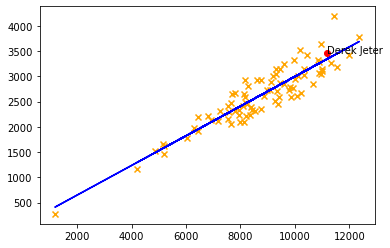

In [13]:
for k1,v1 in reg_HOF_stats.iterrows():
    if (v1['playerID'] == 'jeterde01'):
        plt.scatter(marker='o',x=v1['AB'],y=v1['H'],c='red')
        plt.annotate('Derek Jeter',(v1['AB'],v1['H']))
    else:
        plt.scatter(marker='x',x=v1['AB'],y=v1['H'],c='orange')

x = reg_HOF_stats['AB']
y = reg_HOF_stats['H']
m,b = np.polyfit(x,y,1)
plt.plot(x, m*x+b, '-', color='blue')
print(m,b)

In [14]:
x = pd.DataFrame(reg_HOF_stats['AB'])
y = reg_HOF_stats['H']

reg = linear_model.LinearRegression().fit(x,y)
print(reg.coef_)

[0.29349046]


In [15]:
reg_HOF_stats['PredictedHits'] = reg.predict(x)
reg_HOF_stats['ResidualHits'] = reg_HOF_stats['H'] - reg_HOF_stats['PredictedHits']
reg_HOF_stats.sort_values(by='ResidualHits',ascending=False,inplace=True)
reg_HOF_stats.head(20)

,playerID,Vote%,POS,GP,E,H,AB,HR,SB,TB,OUTS,FieldPer,PredictedHits,ResidualHits
0,cobbty01,98.230088,OF,2954,278.0,4189,11436,117,896.0,7197.0,6917,96.136206,3416.655124,772.344876
12,hornsro01,78.111588,SS,2164,500.0,2930,8173,301,135.0,5798.0,11337,95.775957,2458.995738,471.004262
6,speaktr01,82.089552,OF,2717,224.0,3514,10195,117,432.0,6585.0,7397,97.060753,3052.433458,461.566542
5,lajoina01,83.582090,1B,2441,518.0,3243,9590,82,380.0,5122.0,15211,96.706720,2874.871726,368.128274
99,gwynnto01,97.614679,OF,2326,62.0,3141,9288,135,319.0,5073.0,4672,98.690325,2786.237606,354.762394
11,keelewi01,75.547445,3B,2104,167.0,2932,8591,33,495.0,4215.0,3533,95.486486,2581.674752,350.325248
38,musiast01,93.235294,OF,2907,142.0,3630,10972,475,78.0,7786.0,13257,98.940219,3280.475549,349.524451
10,collied01,77.737226,2B,2701,452.0,3315,9949,47,741.0,5844.0,14337,96.943674,2980.234803,334.765197
36,willite01,93.377483,OF,2152,113.0,2654,7706,521,24.0,6944.0,4300,97.439384,2321.935691,332.064309
9,sislege01,85.766423,1B,2036,274.0,2812,8267,102,375.0,4391.0,20487,98.680218,2486.583842,325.416158


<AxesSubplot:ylabel='ResidualHits'>

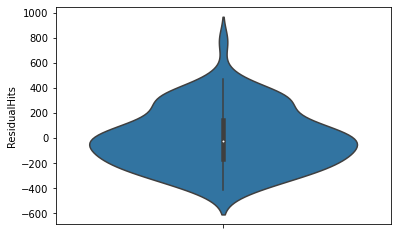

In [16]:
sns.violinplot(y=reg_HOF_stats['ResidualHits'])

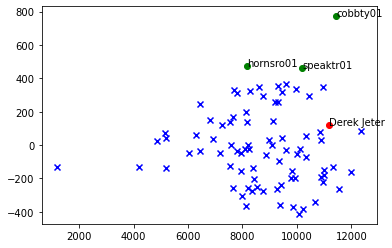

In [17]:
for k1,v1 in reg_HOF_stats.iterrows():
    if (v1['playerID'] == 'jeterde01'):
        plt.scatter(marker='o',x=v1['AB'],y=v1['ResidualHits'],c='red')
        plt.annotate('Derek Jeter',(v1['AB'],v1['ResidualHits']))
    elif (v1['ResidualHits'] > 400):
        plt.scatter(marker='o',x=v1['AB'],y=v1['ResidualHits'],c='green')
        plt.annotate(v1['playerID'],(v1['AB'],v1['ResidualHits']))
    else:
        plt.scatter(marker='x',x=v1['AB'],y=v1['ResidualHits'],c='blue')

cobbty01: Ty Cobb
hornsro01: Roger Horsnby
cobbTy01: Ty Cobb

Text(0, 0.5, 'Total Bases')

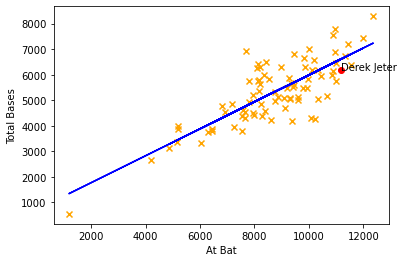

In [18]:
for k2,v2 in reg_HOF_stats.iterrows():
    if (v2['playerID'] == 'jeterde01'):
        plt.scatter(marker='o',x=v2['AB'],y=v2['TB'],c='red')
        plt.annotate('Derek Jeter',(v2['AB'],v2['TB']))
    else:
        plt.scatter(marker='x',x=v2['AB'],y=v2['TB'],c='orange')

x = reg_HOF_stats['AB']
y = reg_HOF_stats['TB']
m,b = np.polyfit(x,y,1)
plt.plot(x, m*x+b, '-', color='blue')
plt.xlabel("At Bat")
plt.ylabel("Total Bases")

In [19]:
x2 = pd.DataFrame(reg_HOF_stats['AB'])
y2 = reg_HOF_stats['TB']

regBases = linear_model.LinearRegression().fit(x2,y2)
print(regBases.coef_, regBases.intercept_)

[0.52724542] 720.4727204024457


In [20]:
reg_HOF_stats['PredictedBases'] = regBases.predict(x2)
reg_HOF_stats['ResidualBases'] = reg_HOF_stats['TB'] - reg_HOF_stats['PredictedBases']

In [21]:
reg_HOF_stats.head(10)

,playerID,Vote%,POS,GP,E,H,AB,HR,SB,TB,OUTS,FieldPer,PredictedHits,ResidualHits,PredictedBases,ResidualBases
0,cobbty01,98.230088,OF,2954,278.0,4189,11436,117,896.0,7197.0,6917,96.136206,3416.655124,772.344876,6750.051386,446.948614
12,hornsro01,78.111588,SS,2164,500.0,2930,8173,301,135.0,5798.0,11337,95.775957,2458.995738,471.004262,5029.649568,768.350432
6,speaktr01,82.089552,OF,2717,224.0,3514,10195,117,432.0,6585.0,7397,97.060753,3052.433458,461.566542,6095.739815,489.260185
5,lajoina01,83.582090,1B,2441,518.0,3243,9590,82,380.0,5122.0,15211,96.706720,2874.871726,368.128274,5776.756334,-654.756334
99,gwynnto01,97.614679,OF,2326,62.0,3141,9288,135,319.0,5073.0,4672,98.690325,2786.237606,354.762394,5617.528216,-544.528216
11,keelewi01,75.547445,3B,2104,167.0,2932,8591,33,495.0,4215.0,3533,95.486486,2581.674752,350.325248,5250.038155,-1035.038155
38,musiast01,93.235294,OF,2907,142.0,3630,10972,475,78.0,7786.0,13257,98.940219,3280.475549,349.524451,6505.409509,1280.590491
10,collied01,77.737226,2B,2701,452.0,3315,9949,47,741.0,5844.0,14337,96.943674,2980.234803,334.765197,5966.037441,-122.037441
36,willite01,93.377483,OF,2152,113.0,2654,7706,521,24.0,6944.0,4300,97.439384,2321.935691,332.064309,4783.425955,2160.574045
9,sislege01,85.766423,1B,2036,274.0,2812,8267,102,375.0,4391.0,20487,98.680218,2486.583842,325.416158,5079.210638,-688.210638


<AxesSubplot:ylabel='ResidualBases'>

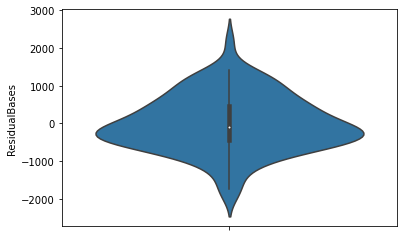

In [22]:
sns.violinplot(y=reg_HOF_stats['ResidualBases'])

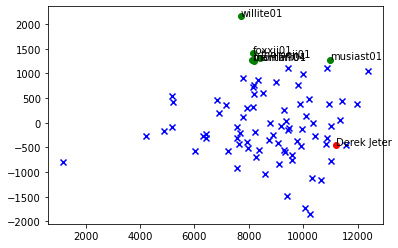

In [23]:
for k1,v1 in reg_HOF_stats.iterrows():
    if (v1['playerID'] == 'jeterde01'):
        plt.scatter(marker='o',x=v1['AB'],y=v1['ResidualBases'],c='red')
        plt.annotate('Derek Jeter',(v1['AB'],v1['ResidualBases']))
    elif (v1['ResidualBases'] > 1250):
        plt.scatter(marker='o',x=v1['AB'],y=v1['ResidualBases'],c='green')
        plt.annotate(v1['playerID'],(v1['AB'],v1['ResidualBases']))
    else:
        plt.scatter(marker='x',x=v1['AB'],y=v1['ResidualBases'],c='blue')

In [24]:
for i,r in reg_HOF_stats.iterrows():
    if r['playerID'] == 'jeterde01':
        print("Jeter's total hits residual was " +str(r['ResidualHits']) +" and his total Bases residual was " +str(r['ResidualBases']))

Jeter's total hits residual was 119.07607776933901 and his total Bases residual was -449.98523875063347


In [25]:
Part 3: Comparing his fielding

SyntaxError: invalid syntax (<ipython-input-25-466e42e82b3f>, line 1)